Voxels in layer 1 = 1158
Voxels in layer 2 = 839
Voxels in layer 3 = 669
Voxels in layer 4 = 531
Voxels in layer 5 = 406
Voxels in layer 6 = 295
Voxels in layer 7 = 190
Voxels in layer 8 = 112
Voxels in layer 9 = 44
Voxels in layer 10 = 7


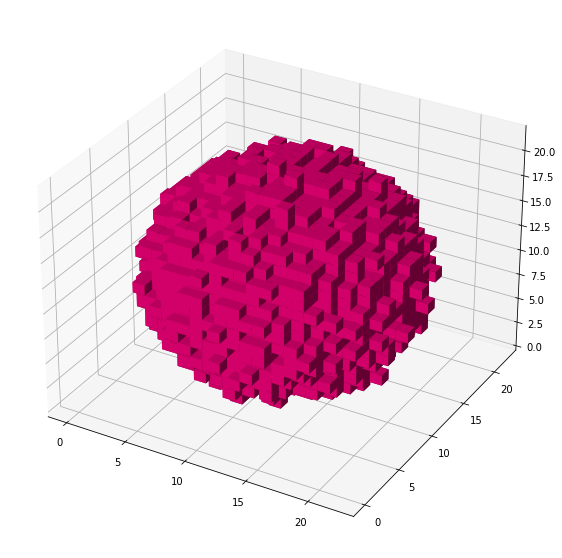

In [435]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import ndimage

%matplotlib inline

# Parse the x,y,z line input from the file
with open('day18-input.txt') as f:
    lines = f.read().splitlines()
    lines = [line.split(',') for line in lines]
    lines = [(int(line[0]), int(line[1]), int(line[2])) for line in lines]

points = lines

x = max([x[0] for x in points])
y = max([x[1] for x in points])
z = max([x[2] for x in points])
d = max([max(x) for x in points])

n_drop = np.zeros((d+1, d+1, d+1), dtype=bool)
for point in points:
    n_drop[point[0], point[1], point[2]] = True

n_drop = ndimage.binary_fill_holes(n_drop)

colors = np.empty(n_drop.shape, dtype=object)
colors[n_drop] = '#EE0077FF'
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection='3d')

face_layers = [
    ax.voxels(n_drop, facecolors=colors)
]
face_points = [
    n_drop.copy()
]
while len(face_layers[-1]) > 0:
    print("Voxels in layer {} = {}".format(len(face_layers), len(face_layers[-1])))
    for face in face_layers[-1]:
        n_drop[face] = False
    next_layer = ax.voxels(n_drop, facecolors=colors)
    face_points.append(n_drop.copy())
    if len(next_layer) > 0:
        face_layers.append(next_layer)
    else:
        break
    

plt.show()

In [437]:
layer_paths = {}
for i in range(len(face_layers)):
    layer_paths[i] = 0
    for face in face_layers[i]:
        layer_paths[i] += len(face_layers[i][face].get_paths())

print("Surfaces showing: ", layer_paths[0])
print(layer_paths)

Surfaces showing:  2588
{0: 2588, 1: 1938, 2: 1548, 3: 1224, 4: 940, 5: 676, 6: 454, 7: 276, 8: 124, 9: 30}


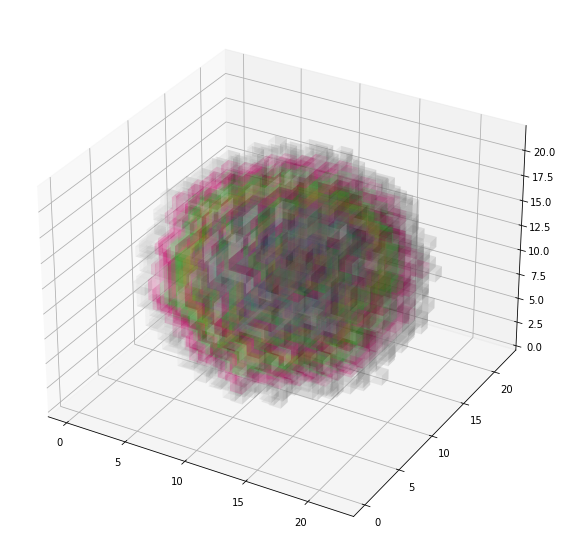

In [439]:
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

face_colors = ['#F4F4F422', '#EE007722', '#00CC0022', '#A0A00022', '#A000A022', '#00A0A022', '#A0A0A022', '#0000A022', '#A0000022', '#00A00022', '#A0A00022', '#00007722' ]

for i in range(len(face_points)):
    ax.voxels(face_points[i], facecolors=face_colors[i])

In [440]:
all_paths = []
unique_paths = []
for face in polys:
    for path in polys[face].get_paths():
        for verts in path.vertices.tolist():
            all_paths.append(verts)
            if verts not in unique_paths:
                unique_paths.append(verts)


print("all: {}, unique: {}".format(len(all_paths), len(unique_paths)))

all: 650, unique: 183
